In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

**Link**: [Pokemon With Stats](https://www.kaggle.com/abcsds/pokemon)

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data:
- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

In [2]:
df = pd.read_csv("data/Pokemon.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

In [3]:
df = df.drop("#", axis = 1)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
df.count()

Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

In [8]:
df.nunique()

Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

- Total number pokemon in this dataset is 800 with more than 700 is non-legendary pokemon.
- By generation, gen 1, gen3, and gen 5 have the most number of pokemon while gen 6 have the least number of pokemon.
- In term of number of legendary pokemon, gen 1 and gen2 have the least number and gen 3 have the most number.
- There are no significant difference from all variable for each generation. Every generation have the same distribution total score.
- Based on total score, Pokemon with dragon type have the total score higher than other types.
- Based on hp, all types have the same average.
- Based on attack, Pokemon with dragon and ground type have higher score and fairy type have the lowest score.
- Based on defense,Pokemon with steel type have the higher score.
- Based on special attack, Pokemon with psychic and dragon type have higher score rather than other type.
- Based on special defense, Pokemon with psychic type have the highest score.
- Based on speed, Pokemon with psychic type have the highest score.
- Basicly, if we choose Pokemon with dragon type and psychic without consider about the type rules, we will have the strongest Pokemon. But of course it's not good if we only have the same type Pokemon in our party, would be better if we diverse our Pokemon type because some Pokemon type will have advantages if fight againts dragon or psychic type.

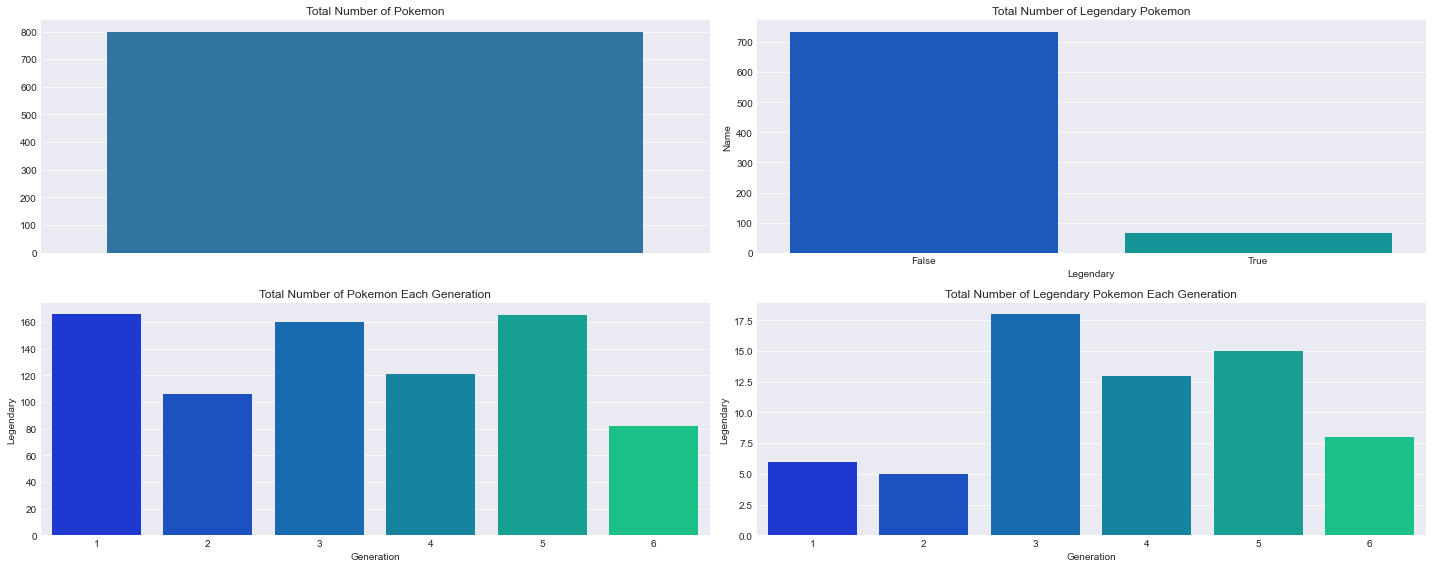

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
sns.barplot(y = df["Name"].count(), ax = ax[0, 0])
sns.barplot(x = "Legendary", y = "Name", data = df.groupby("Legendary").count().reset_index(), palette = "winter", ax = ax[0, 1])
sns.barplot(x = "Generation", y = "Legendary", data = df.groupby("Generation").count().reset_index(), palette = "winter", ax = ax[1, 0])
sns.barplot(x = "Generation", y = "Legendary", data = df.groupby("Generation").sum().reset_index(), palette = "winter", ax = ax[1, 1])
ax[0, 0].set_title("Total Number of Pokemon")
ax[0, 1].set_title("Total Number of Legendary Pokemon")
ax[1, 0].set_title("Total Number of Pokemon Each Generation")
ax[1, 1].set_title("Total Number of Legendary Pokemon Each Generation")
plt.tight_layout()
plt.show()

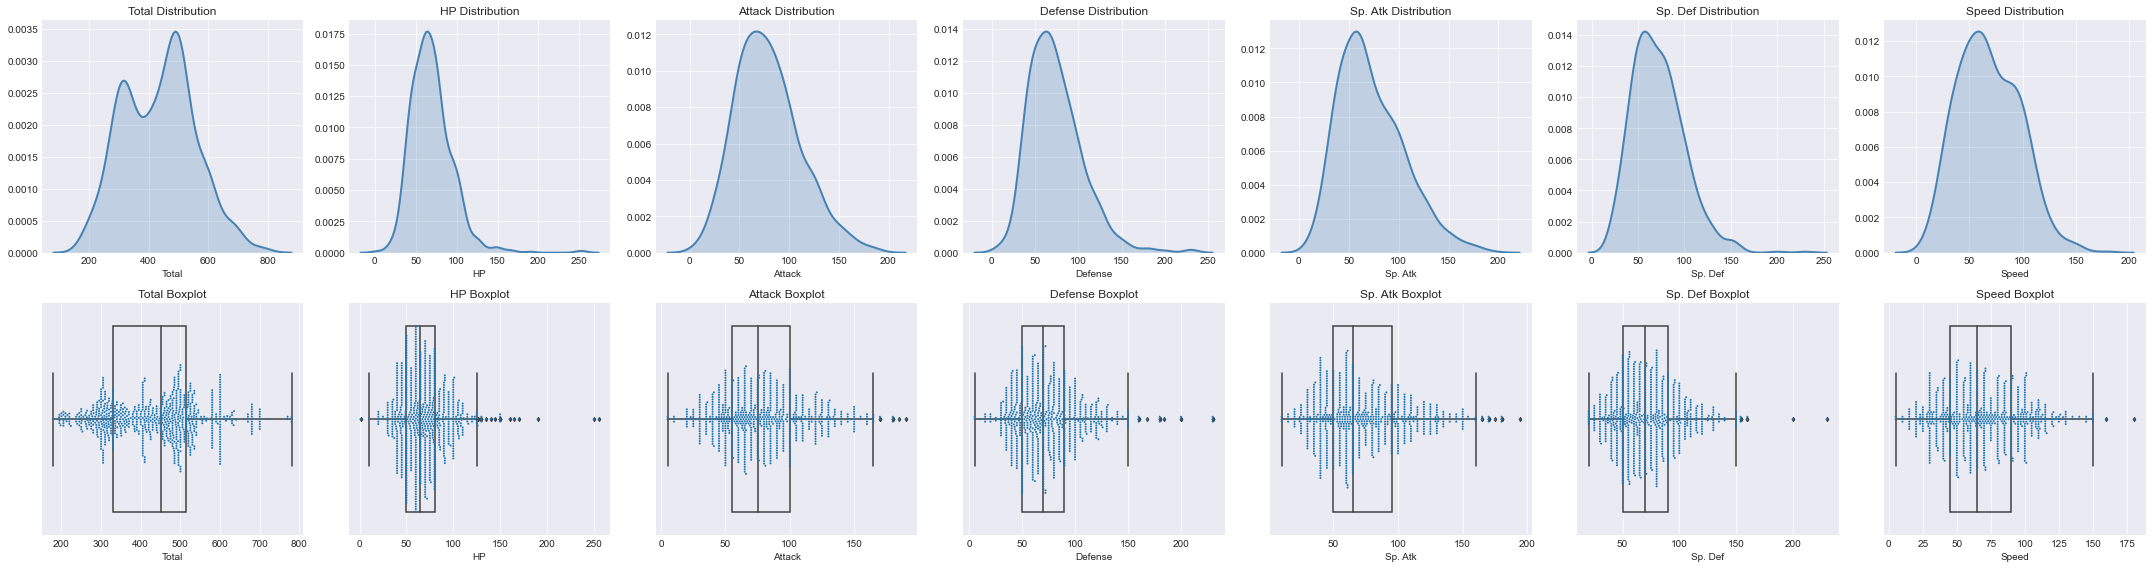

In [10]:
fig, ax = plt.subplots(2, 7, figsize = (30, 8))
columns = df.columns[3:10]
for col in range(len(columns)):
    sns.distplot(df[columns[col]], hist = False,
                 kde_kws = {"shade": True, "linewidth": 2},
                 color = "steelblue", ax = ax[0, col]); ax[0, col].set_title(columns[col] + " Distribution")
    sns.boxplot(df[columns[col]], fliersize = 3, boxprops={'facecolor':'None'},
                ax = ax[1, col]); ax[1, col].set_title(columns[col] + " Boxplot")
    sns.swarmplot(df[columns[col]], size = 2, ax = ax[1, col])
plt.tight_layout()
plt.show()

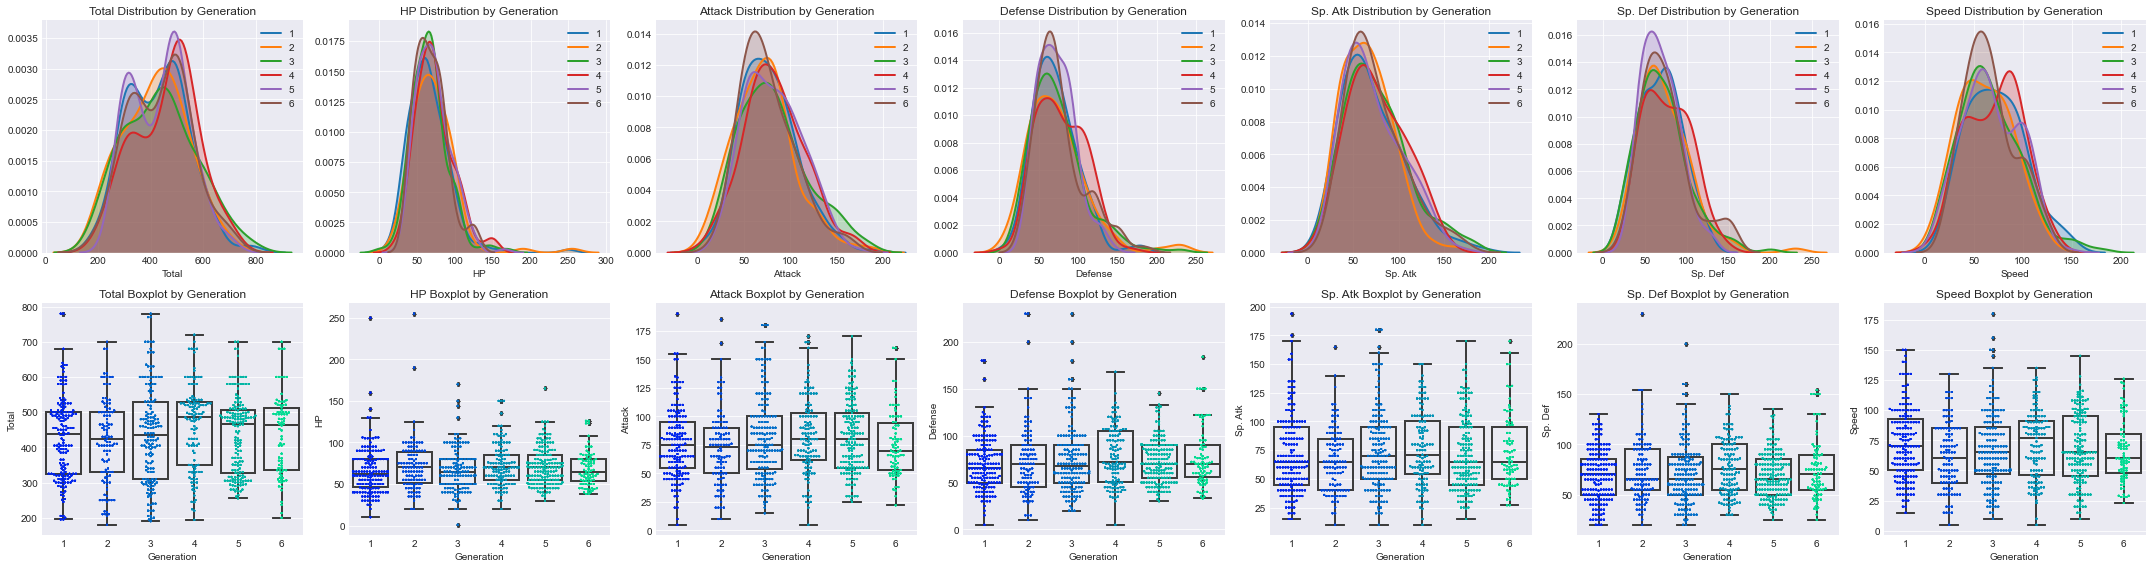

In [11]:
fig, ax = plt.subplots(2, 7, figsize = (30, 8))
columns = df.columns[3:10]
for col in range(len(columns)):
    for gen in df["Generation"].unique():
        sns.distplot(df[df["Generation"] == gen][columns[col]], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = gen,
                     ax = ax[0, col]); ax[0, col].set_title(columns[col] + " Distribution by Generation")
        sns.boxplot(x = df["Generation"], y = df[columns[col]], fliersize = 3, boxprops={'facecolor':'None'},
                    ax = ax[1, col]); ax[1, col].set_title(columns[col] + " Boxplot by Generation")
        sns.swarmplot(x = df["Generation"], y = df[columns[col]], size = 2, label = gen, palette = "winter", ax = ax[1, col])
plt.tight_layout()
plt.show()

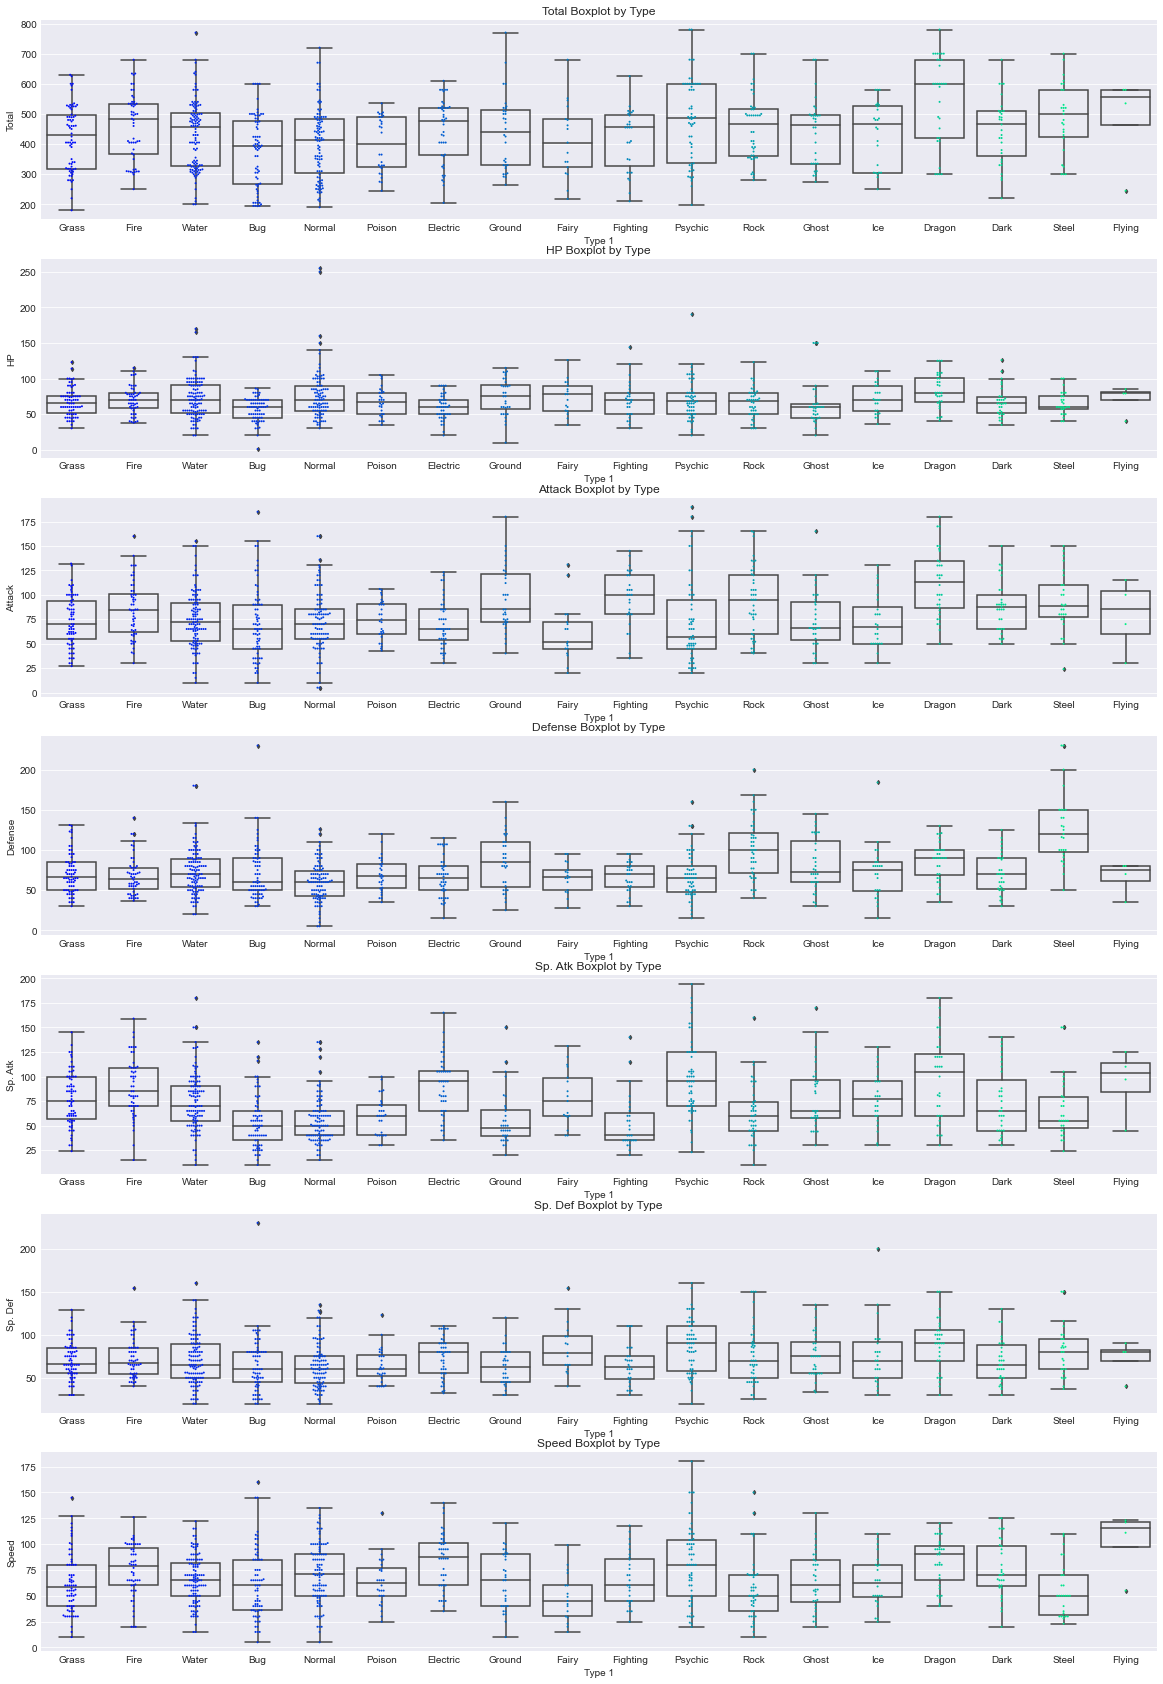

In [12]:
fig, ax = plt.subplots(7, 1, figsize = (20, 30))
rows = df.columns[3:10]
for row in range(len(rows)):
    sns.boxplot(x = df["Type 1"], y = df[rows[row]], fliersize = 3, boxprops={'facecolor':'None'},
                ax = ax[row]); ax[row].set_title(rows[row] + " Boxplot by Type")
    sns.swarmplot(x = df["Type 1"], y = df[rows[row]], size = 2, label = gen, palette = "winter", ax = ax[row])

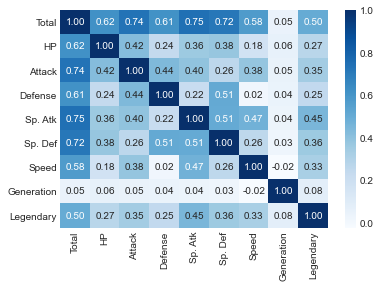

In [13]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

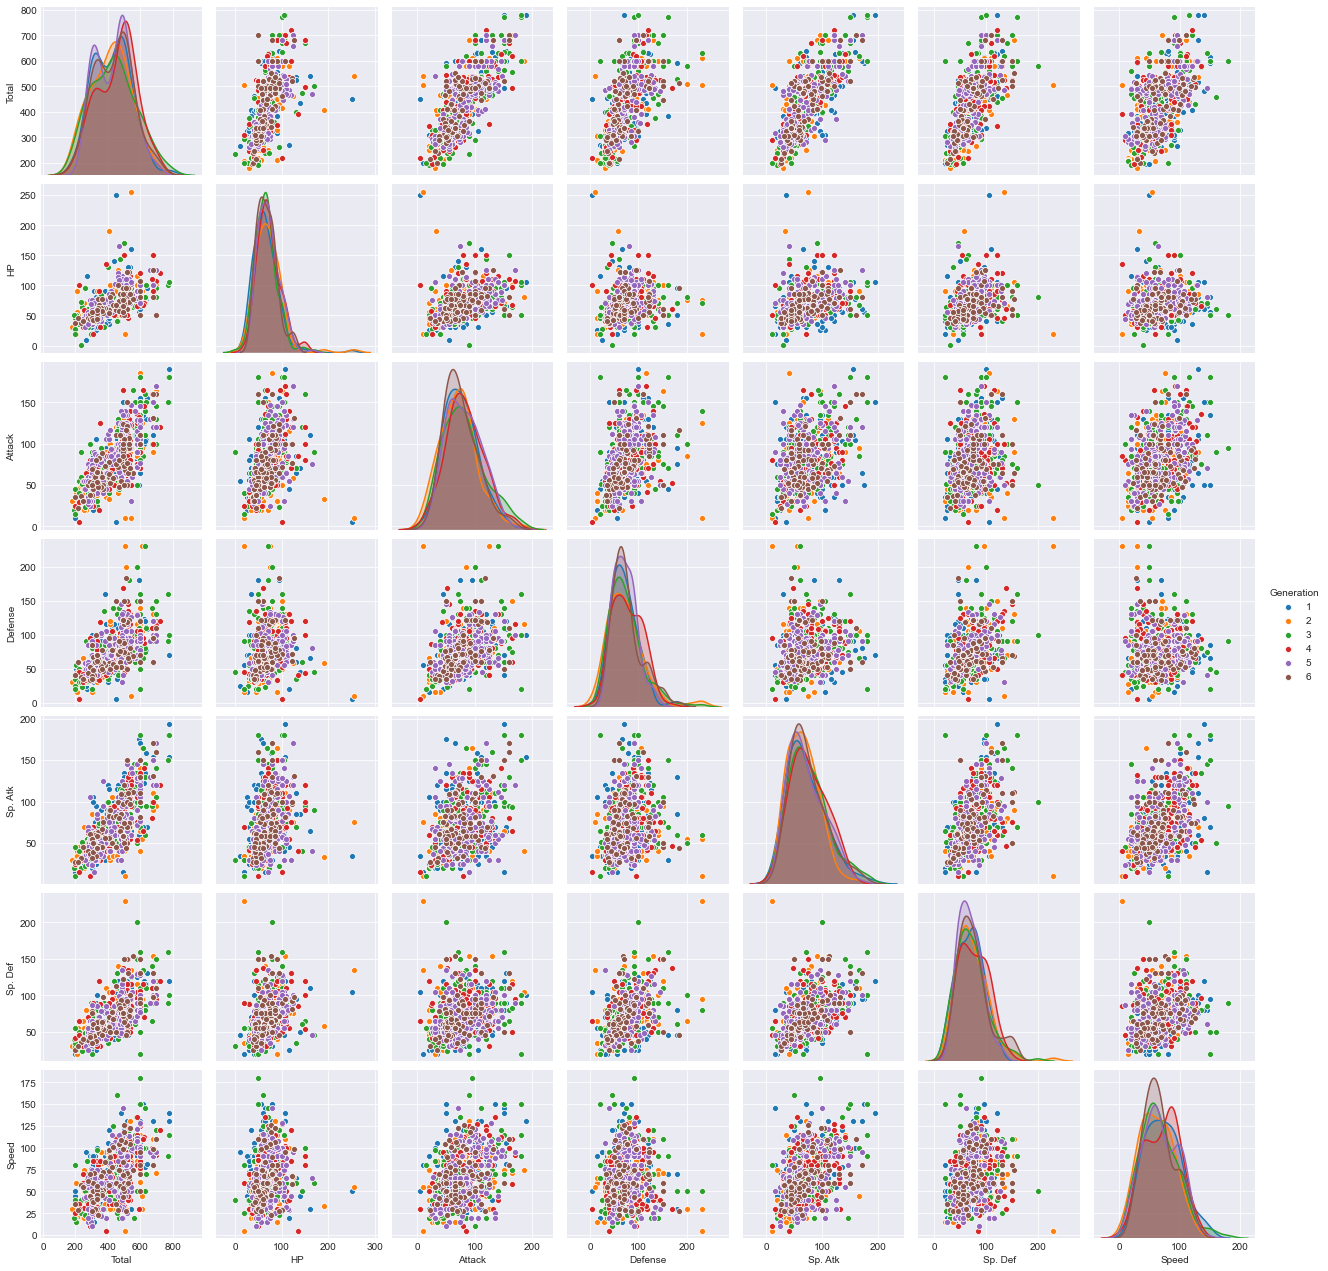

In [14]:
sns.pairplot(df.select_dtypes(include = "int64"), hue = "Generation")
plt.show()

In [15]:
total = pd.DataFrame()
hp = pd.DataFrame()
atk = pd.DataFrame()
dfd = pd.DataFrame()
spatk = pd.DataFrame()
spdfd = pd.DataFrame()
spd = pd.DataFrame()
for gen in range(len(df["Generation"].unique())):
    for typ in range(len(df["Type 1"].unique())):
        combination = (df["Type 1"] == df["Type 1"].unique()[typ]) & (df["Generation"] == df["Generation"].unique()[gen]) & (df["Legendary"] == False)
        total = total.append(df[combination][["Name", "Type 1", "Generation", "Total"]].sort_values("Total", ascending = False).head(1))
        hp = hp.append(df[combination][["Name", "Type 1", "Generation", "HP"]].sort_values("HP", ascending = False).head(1))
        atk = atk.append(df[combination][["Name", "Type 1", "Generation", "Attack"]].sort_values("Attack", ascending = False).head(1))
        dfd = dfd.append(df[combination][["Name", "Type 1", "Generation", "Defense"]].sort_values("Defense", ascending = False).head(1))
        spatk = spatk.append(df[combination][["Name", "Type 1", "Generation", "Sp. Atk"]].sort_values("Sp. Atk", ascending = False).head(1))
        spdfd = spdfd.append(df[combination][["Name", "Type 1", "Generation", "Sp. Def"]].sort_values("Sp. Def", ascending = False).head(1))
        spd = spd.append(df[combination][["Name", "Type 1", "Generation", "Speed"]].sort_values("Speed", ascending = False).head(1))

In [16]:
print("BEST POKEMON PER TYPE EACH GENERATION BY TOTAL")
total.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY TOTAL


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,PinsirMega Pinsir,,Dragonite,Jolteon,Clefable,Machamp,CharizardMega Charizard X,,GengarMega Gengar,VenusaurMega Venusaur,Rhydon,Jynx,KangaskhanMega Kangaskhan,Nidoqueen,Mew,AerodactylMega Aerodactyl,,GyaradosMega Gyarados
2,ScizorMega Scizor,HoundoomMega Houndoom,,AmpharosMega Ampharos,Granbull,Hitmontop,Typhlosion,,Misdreavus,Meganium,Donphan,Piloswine,Blissey,Crobat,Celebi,TyranitarMega Tyranitar,SteelixMega Steelix,Kingdra
3,Ninjask,AbsolMega Absol,SalamenceMega Salamence,ManectricMega Manectric,,MedichamMega Medicham,BlazikenMega Blaziken,,BanetteMega Banette,SceptileMega Sceptile,Flygon,GlalieMega Glalie,Slaking,Swalot,GardevoirMega Gardevoir,Cradily,MetagrossMega Metagross,SwampertMega Swampert
4,Yanmega,Weavile,GarchompMega Garchomp,Electivire,Togekiss,LucarioMega Lucario,Magmortar,,Dusknoir,AbomasnowMega Abomasnow,Rhyperior,Mamoswine,LopunnyMega Lopunny,Drapion,GalladeMega Gallade,Probopass,Bronzong,Manaphy
5,Genesect,Hydreigon,Haxorus,Eelektross,,Mienshao,DarmanitanZen Mode,,Chandelure,Serperior,Krookodile,Vanilluxe,MeloettaPirouette Forme,Garbodor,Sigilyph,Archeops,Klinklang,KeldeoResolute Forme
6,Vivillon,Malamar,Goodra,Heliolisk,Florges,Hawlucha,Delphox,Noivern,GourgeistAverage Size,Gogoat,,Avalugg,Furfrou,Dragalge,MeowsticMale,Tyrantrum,AegislashBlade Forme,Greninja


In [17]:
print("BEST POKEMON PER TYPE EACH GENERATION BY HP")
hp.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY HP


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,Venomoth,,Dragonite,Electabuzz,Clefable,Machamp,Arcanine,,Gengar,Exeggutor,Rhydon,Jynx,Chansey,Muk,Mew,Golem,,Vaporeon
2,Heracross,Umbreon,,Ampharos,Granbull,Hitmontop,Typhlosion,,Misdreavus,Meganium,Phanpy,Piloswine,Blissey,Crobat,Wobbuffet,Tyranitar,Steelix,Lanturn
3,Masquerain,Mightyena,Salamence,Manectric,,Hariyama,Blaziken,,Banette,Tropius,Flygon,Walrein,Slaking,Swalot,Wynaut,Cradily,Metagross,Wailord
4,Yanmega,Honchkrow,Garchomp,Luxray,Togekiss,Lucario,Infernape,,Drifblim,Tangrowth,Rhyperior,Mamoswine,Munchlax,Skuntank,Cresselia,Rampardos,Bronzong,Gastrodon
5,Volcarona,Mandibuzz,Druddigon,Eelektross,,Throh,Emboar,,Lampent,Amoonguss,Excadrill,Beartic,AudinoMega Audino,Garbodor,Musharna,Gigalith,Klang,Alomomola
6,Vivillon,Malamar,Goodra,Dedenne,Aromatisse,Pangoro,Pyroar,Noivern,Trevenant,Gogoat,,Avalugg,Diggersby,Dragalge,MeowsticMale,Aurorus,AegislashBlade Forme,Greninja


In [18]:
print("BEST POKEMON PER TYPE EACH GENERATION BY ATTACK")
atk.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY ATTACK


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,PinsirMega Pinsir,,Dragonite,Raichu,Clefable,Machamp,CharizardMega Charizard X,,Gengar,Victreebel,Rhydon,Jynx,KangaskhanMega Kangaskhan,Muk,Mew,AerodactylMega Aerodactyl,,GyaradosMega Gyarados
2,HeracrossMega Heracross,Sneasel,,AmpharosMega Ampharos,Granbull,Hitmontop,Typhlosion,,Misdreavus,Meganium,Donphan,Piloswine,Ursaring,Crobat,Celebi,TyranitarMega Tyranitar,SteelixMega Steelix,Feraligatr
3,Ninjask,AbsolMega Absol,SalamenceMega Salamence,Manectric,,Hariyama,BlazikenMega Blaziken,,BanetteMega Banette,Breloom,Trapinch,GlalieMega Glalie,Slaking,Seviper,GardevoirMega Gardevoir,Armaldo,MetagrossMega Metagross,SwampertMega Swampert
4,Mothim,Honchkrow,GarchompMega Garchomp,Electivire,Togekiss,LucarioMega Lucario,Infernape,,Dusknoir,AbomasnowMega Abomasnow,Rhyperior,Mamoswine,LopunnyMega Lopunny,Toxicroak,GalladeMega Gallade,Rampardos,Bronzong,Floatzel
5,Escavalier,Bisharp,Haxorus,Eelektross,,Conkeldurr,DarmanitanStandard Mode,,Chandelure,Simisage,Excadrill,Beartic,MeloettaPirouette Forme,Garbodor,Beheeyem,Archeops,Klinklang,Carracosta
6,Vivillon,Malamar,Goodra,Dedenne,Slurpuff,Pangoro,Talonflame,Noivern,Trevenant,Chesnaught,,Avalugg,Furfrou,Dragalge,Espurr,Tyrantrum,AegislashBlade Forme,Greninja


In [19]:
print("BEST POKEMON PER TYPE EACH GENERATION BY DEFENSE")
dfd.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY DEFENSE


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,PinsirMega Pinsir,,Dragonite,Magneton,Clefable,Machamp,CharizardMega Charizard X,,GengarMega Gengar,VenusaurMega Venusaur,Rhydon,Jynx,KangaskhanMega Kangaskhan,Weezing,Mew,Onix,,Cloyster
2,Shuckle,Umbreon,,AmpharosMega Ampharos,Togetic,Hitmontop,Magcargo,,Misdreavus,Meganium,Donphan,Piloswine,Miltank,Crobat,Celebi,TyranitarMega Tyranitar,SteelixMega Steelix,Feraligatr
3,Nincada,SableyeMega Sableye,SalamenceMega Salamence,ManectricMega Manectric,,MedichamMega Medicham,Torkoal,,Dusclops,Tropius,Claydol,Walrein,Slaking,Swalot,Chimecho,Nosepass,AggronMega Aggron,Relicanth
4,WormadamSandy Cloak,Weavile,GarchompMega Garchomp,Magnezone,Togekiss,LucarioMega Lucario,Infernape,,Dusknoir,Leafeon,Rhyperior,Glaceon,Lickilicky,Drapion,Cresselia,Bastiodon,Bronzong,Manaphy
5,Crustle,Scrafty,Haxorus,Eelektross,,Conkeldurr,DarmanitanZen Mode,,Cofagrigus,Ferrothorn,Stunfisk,Vanilluxe,AudinoMega Audino,Garbodor,Gothitelle,Gigalith,Klinklang,Carracosta
6,Spewpa,Malamar,Goodra,Dedenne,Slurpuff,Pangoro,Delphox,Noivern,GourgeistAverage Size,Chesnaught,,Avalugg,Diggersby,Dragalge,MeowsticMale,Carbink,Doublade,Clawitzer


In [20]:
print("BEST POKEMON PER TYPE EACH GENERATION BY SPECIAL ATTACK")
spatk.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY SPECIAL ATTACK


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,Butterfree,,Dragonite,Magneton,Clefable,Machamp,CharizardMega Charizard Y,,GengarMega Gengar,Exeggutor,Dugtrio,Jynx,PidgeotMega Pidgeot,Nidoking,AlakazamMega Alakazam,Omastar,,BlastoiseMega Blastoise
2,Yanma,HoundoomMega Houndoom,,AmpharosMega Ampharos,Togetic,Tyrogue,Typhlosion,,Misdreavus,Sunflora,Donphan,Smoochum,Porygon2,Crobat,Espeon,Tyranitar,Steelix,Octillery
3,Beautifly,AbsolMega Absol,SalamenceMega Salamence,ManectricMega Manectric,,MedichamMega Medicham,CameruptMega Camerupt,,BanetteMega Banette,SceptileMega Sceptile,Flygon,GlalieMega Glalie,Slaking,Seviper,GardevoirMega Gardevoir,Lunatone,MetagrossMega Metagross,Gorebyss
4,Yanmega,Honchkrow,GarchompMega Garchomp,Magnezone,Togekiss,LucarioMega Lucario,Magmortar,,Mismagius,AbomasnowMega Abomasnow,Hippowdon,Glaceon,Porygon-Z,Toxicroak,Cresselia,Probopass,Bronzong,Empoleon
5,Volcarona,Hydreigon,Haxorus,Eelektross,,Mienshao,DarmanitanZen Mode,,Chandelure,Lilligant,Stunfisk,Vanilluxe,MeloettaAria Forme,Garbodor,Duosion,Archeops,Klang,KeldeoResolute Forme
6,Vivillon,Malamar,Goodra,Heliolisk,Florges,Hawlucha,Delphox,Noivern,Trevenant,Gogoat,,Avalugg,Furfrou,Dragalge,MeowsticMale,Aurorus,AegislashBlade Forme,Clawitzer


In [21]:
print("BEST POKEMON PER TYPE EACH GENERATION BY SPECIAL DEFENSE")
spdfd.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY SPECIAL DEFENSE


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,PinsirMega Pinsir,,Dragonite,Jolteon,Clefable,Hitmonlee,CharizardMega Charizard Y,,GengarMega Gengar,VenusaurMega Venusaur,Marowak,Jynx,Snorlax,Muk,Mr. Mime,AerodactylMega Aerodactyl,,GyaradosMega Gyarados
2,Shuckle,Umbreon,,AmpharosMega Ampharos,Togetic,Hitmontop,Typhlosion,,Misdreavus,Meganium,Gligar,Smoochum,Blissey,Crobat,Celebi,TyranitarMega Tyranitar,SteelixMega Steelix,Mantine
3,Dustox,SableyeMega Sableye,Altaria,Minun,,MedichamMega Medicham,CameruptMega Camerupt,,Dusclops,Tropius,Claydol,Walrein,Kecleon,Swalot,GardevoirMega Gardevoir,Cradily,MetagrossMega Metagross,Milotic
4,WormadamPlant Cloak,Weavile,GarchompMega Garchomp,RotomHeat Rotom,Togekiss,Lucario,Magmortar,,Dusknoir,Roserade,Gliscor,Glaceon,Lopunny,Drapion,Cresselia,Probopass,Bronzong,Mantyke
5,Escavalier,Scrafty,Druddigon,Eelektross,,Throh,DarmanitanZen Mode,,Cofagrigus,Ferrothorn,Stunfisk,Cryogonal,MeloettaAria Forme,Garbodor,Gothitelle,Gigalith,Klang,Jellicent
6,Vivillon,Malamar,Goodra,Heliolisk,Florges,Pangoro,Delphox,Noivern,Trevenant,Gogoat,,Avalugg,Furfrou,Dragalge,MeowsticMale,Carbink,AegislashShield Forme,Clawitzer


In [22]:
print("BEST POKEMON PER TYPE EACH GENERATION BY SPEED")
spd.pivot_table(values = "Name", index = "Generation", columns = "Type 1", aggfunc = "first").fillna("")

BEST POKEMON PER TYPE EACH GENERATION BY SPEED


Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,BeedrillMega Beedrill,,Dragonite,Electrode,Clefable,Primeape,Rapidash,,GengarMega Gengar,Venusaur,Dugtrio,Jynx,PidgeotMega Pidgeot,Golbat,AlakazamMega Alakazam,AerodactylMega Aerodactyl,,Starmie
2,Yanma,Sneasel,,Elekid,Granbull,Hitmontop,Typhlosion,,Misdreavus,Jumpluff,Gligar,Delibird,Miltank,Crobat,Espeon,TyranitarMega Tyranitar,Skarmory,Kingdra
3,Ninjask,AbsolMega Absol,SalamenceMega Salamence,ManectricMega Manectric,,MedichamMega Medicham,BlazikenMega Blaziken,,BanetteMega Banette,SceptileMega Sceptile,Flygon,GlalieMega Glalie,Swellow,Seviper,GardevoirMega Gardevoir,Anorith,MetagrossMega Metagross,SharpedoMega Sharpedo
4,Yanmega,Weavile,Garchomp,Pachirisu,Togekiss,LucarioMega Lucario,Infernape,,Mismagius,Leafeon,Gliscor,Froslass,LopunnyMega Lopunny,Drapion,GalladeMega Gallade,Cranidos,Bronzong,Floatzel
5,Accelgor,Liepard,Haxorus,Zebstrika,,Mienshao,Simisear,,Chandelure,Whimsicott,Krookodile,Cryogonal,MeloettaPirouette Forme,Garbodor,Swoobat,Archeops,Klinklang,KeldeoResolute Forme
6,Vivillon,Malamar,Goodra,Heliolisk,Florges,Hawlucha,Talonflame,Noivern,GourgeistSmall Size,Gogoat,,Bergmite,Furfrou,Dragalge,MeowsticMale,Tyrantrum,Klefki,Greninja


In [23]:
best_pokemon = pd.DataFrame()
for gen in range(6):
    list_best = pd.DataFrame(total[total["Generation"] == 1 + gen].sort_values("Total", ascending = False)["Name"].head(6).values)
    best_pokemon = pd.concat([best_pokemon, list_best], axis = 1)
    best_pokemon.rename(columns = {0: "generation_" + str(1 + gen)}, inplace = True)

In [24]:
pd.DataFrame(best_pokemon)

,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6
0,GyaradosMega Gyarados,TyranitarMega Tyranitar,SalamenceMega Salamence,GarchompMega Garchomp,Genesect,Goodra
1,CharizardMega Charizard X,AmpharosMega Ampharos,MetagrossMega Metagross,LucarioMega Lucario,MeloettaPirouette Forme,Florges
2,VenusaurMega Venusaur,SteelixMega Steelix,Slaking,GalladeMega Gallade,Hydreigon,Noivern
3,AerodactylMega Aerodactyl,ScizorMega Scizor,SwampertMega Swampert,Manaphy,KeldeoResolute Forme,Delphox
4,PinsirMega Pinsir,Celebi,SceptileMega Sceptile,AbomasnowMega Abomasnow,Archeops,Gogoat
5,Mew,HoundoomMega Houndoom,BlazikenMega Blaziken,LopunnyMega Lopunny,DarmanitanZen Mode,Greninja


In [25]:
total = total.pivot_table(values = "Total", index = "Generation", columns = "Type 1").fillna(0)

In [26]:
total = total.reset_index()

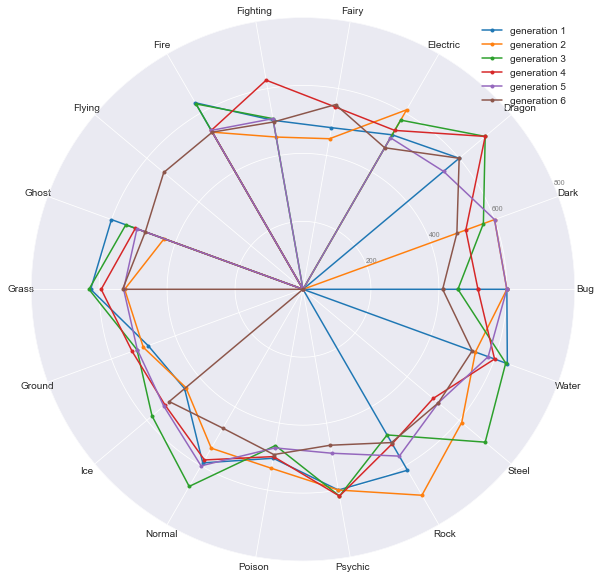

In [27]:
from math import pi
plt.figure(figsize = (10, 10))
categories = total.columns[1:]
N = len(categories)
for gen in range(6):
    values = list(total.iloc[gen, 1:])
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    plt.polar(angles, values, marker = ".", label = "generation " + str(gen + 1))
#     plt.fill(angles, values, alpha = 0.3)

plt.yticks([200, 400, 600, 800], color = "grey", size = 7)
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()

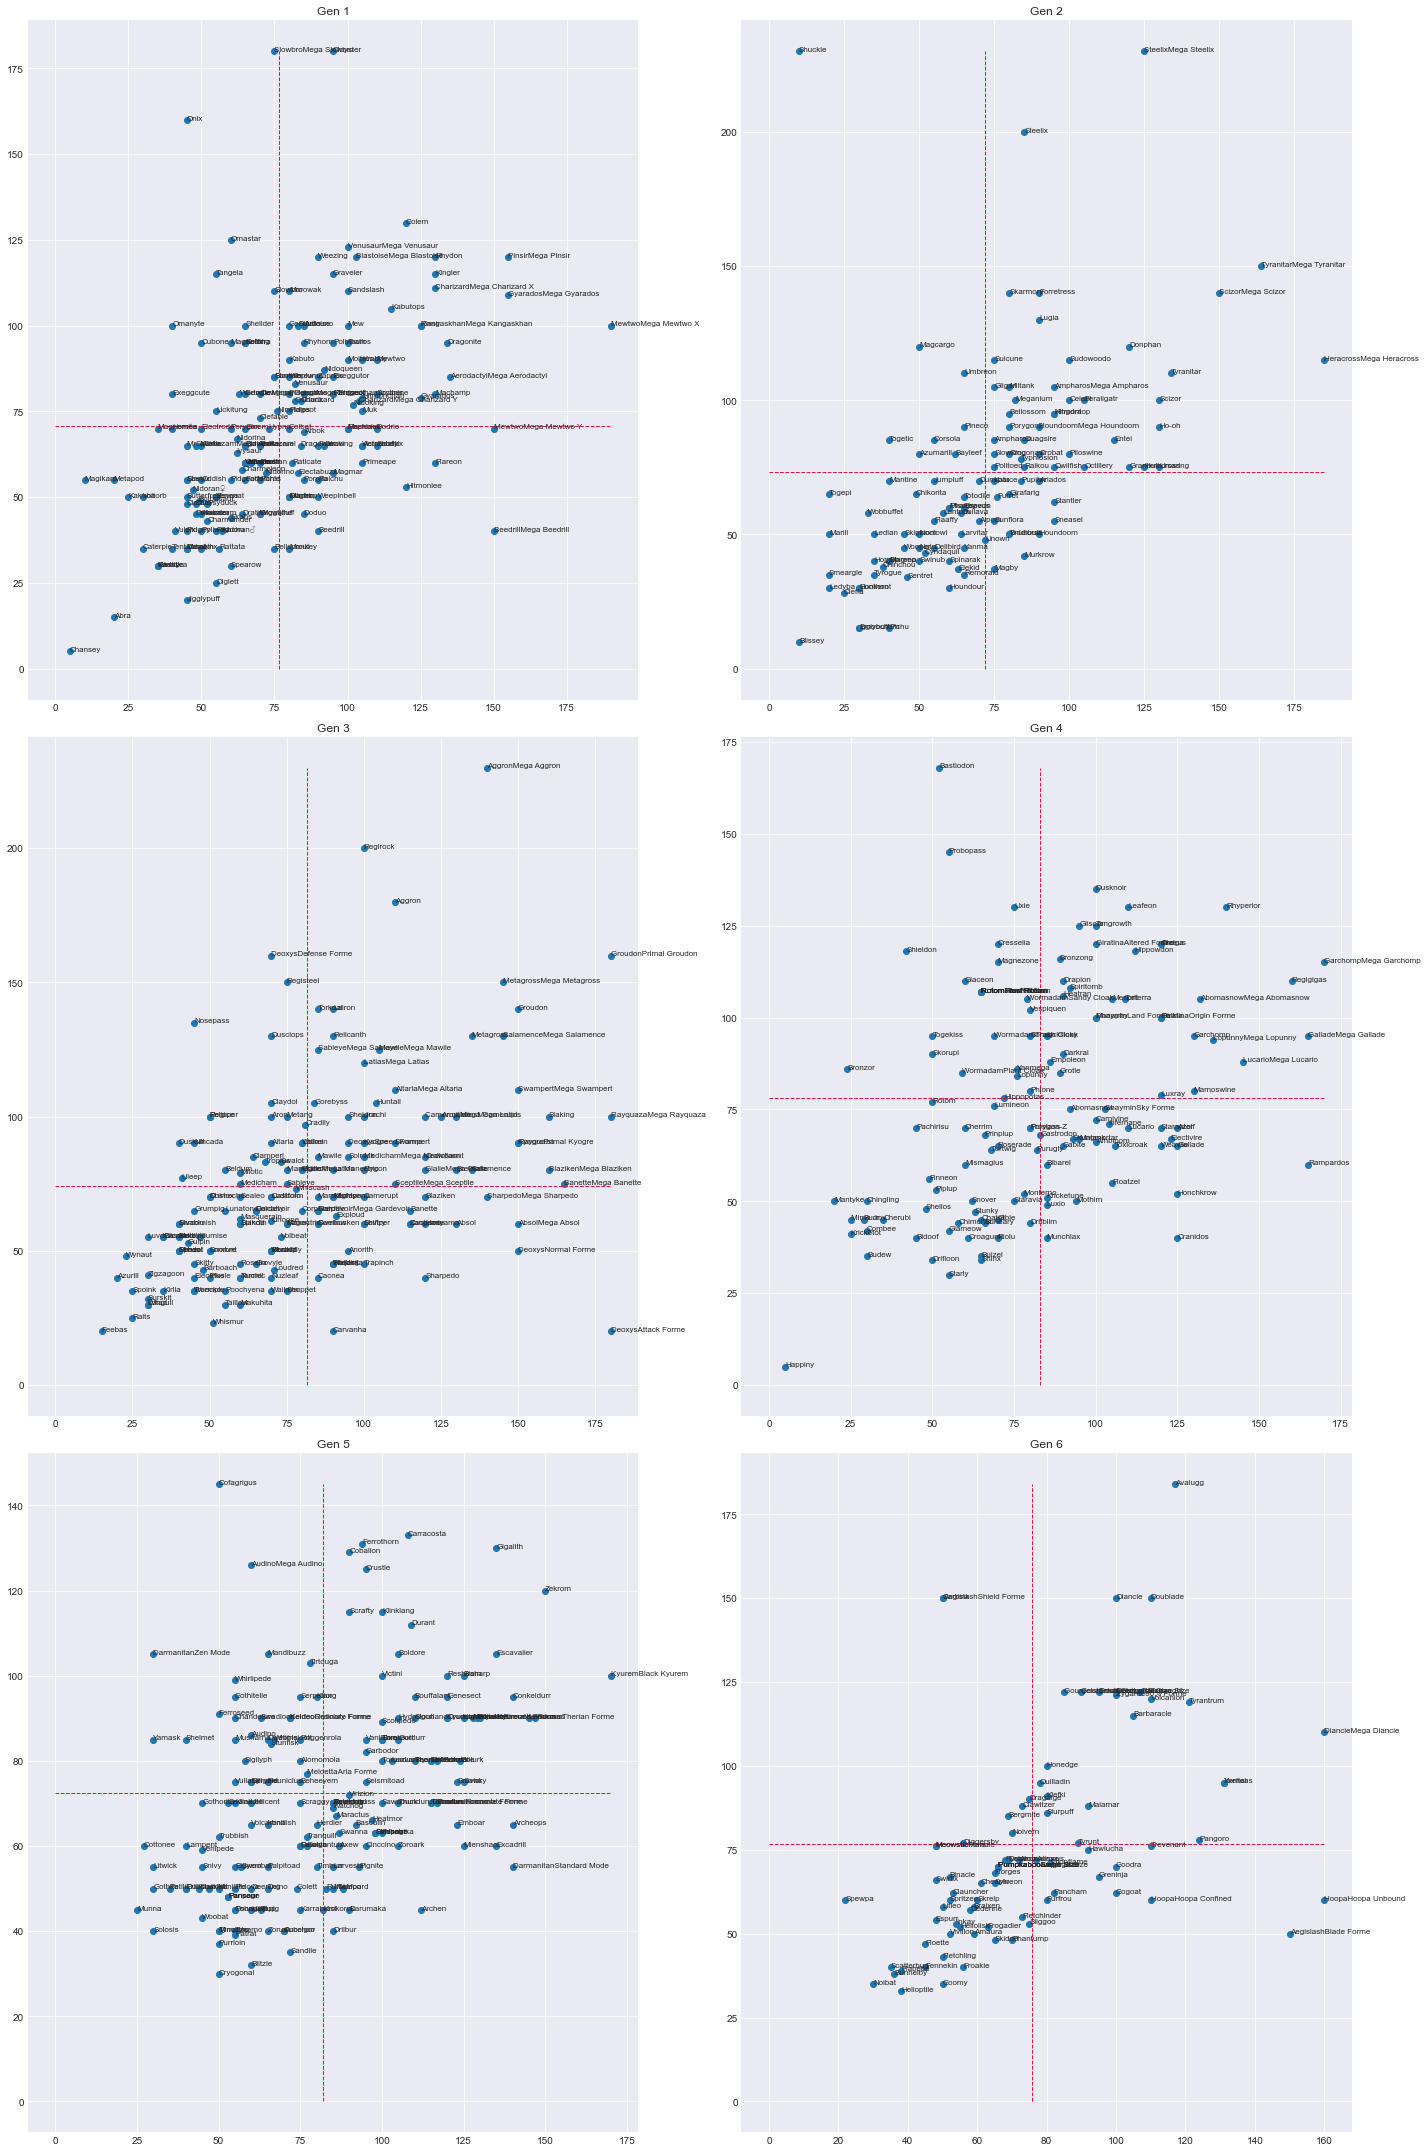

In [28]:
fig, ax = plt.subplots(3, 2, figsize = (20, 30))
for row in range(3):
    for col in range(2):
        data_graph = df[df["Generation"] == 1 + (row * 2) + col]
        ax[row, col].scatter(x = "Attack", y = "Defense", data = data_graph); ax[row, col].set_title("Gen " + str(1 + (row * 2) + col))
        ax[row, col].plot([data_graph["Attack"].mean(), data_graph["Attack"].mean()], [0, data_graph["Defense"].max()], ls = "--", lw = 1, color = "crimson")
        ax[row, col].plot([0, data_graph["Attack"].max()], [data_graph["Defense"].mean(), data_graph["Defense"].mean()], ls = "--", lw = 1, color = "crimson")
        for i, txt in enumerate(data_graph["Name"]):
            ax[row, col].annotate(txt, (data_graph["Attack"].iloc[i], data_graph["Defense"].iloc[i]), size = 8)
plt.tight_layout()
plt.show()

---
## **2. PREPARE THE DATA**
---

**FEATURE SCALING**

In [29]:
data = df.copy()

In [30]:
columns = ["Type 1", "Type 2", "Generation", "Legendary"]
for col in columns:
    data = pd.concat([data, pd.DataFrame(pd.get_dummies(data[col], prefix = col, drop_first = True))], axis = 1)
    data = data.drop(col, axis = 1)

In [31]:
X = data.drop("Name", axis = 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X), columns = ["pc1", "pc2"])

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

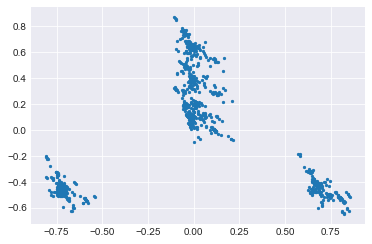

In [36]:
plt.scatter(x = "pc1", y = "pc2", data = X, s = 5)
plt.show()

In [37]:
data = X.values.copy()

In [38]:
# Algorithm
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch

# Model Selection
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Graph
from scipy.cluster.hierarchy import dendrogram

In [39]:
algorithm = {
    "KMeans": KMeans(),
    "Affinity Propagation": AffinityPropagation(damping = 0.6, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False),
    "Spectral Clustering": SpectralClustering(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "DBSCAN": DBSCAN(),
    "OPTICS": OPTICS(),
    "Birch": Birch(threshold = 0.2),
}

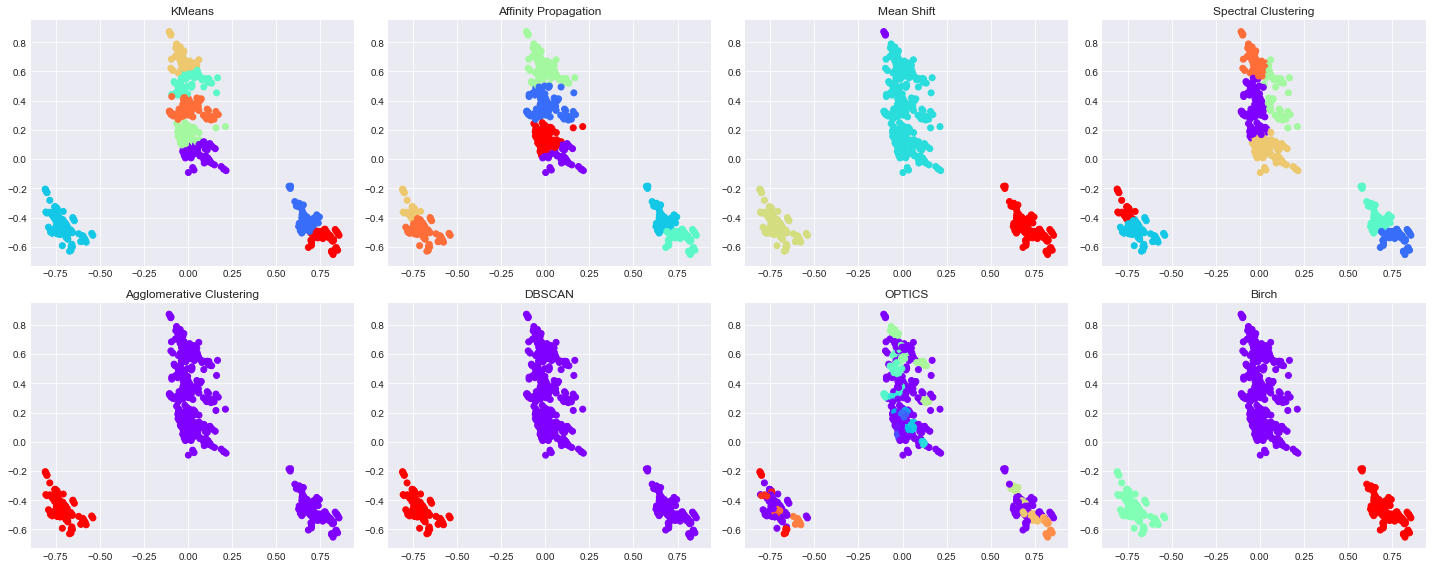

In [40]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()

In [41]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [42]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.493020,0.497509,0.587144,0.443563,0.599898,0.599898,-0.101202,0.784818
Calinski,7012.224351,7017.921363,2455.320218,5227.415889,740.884066,740.884066,16.338660,3522.512594
Davies,0.678604,0.668454,0.339179,0.877737,0.474917,0.474917,2.037668,0.290464


**KMEANS**

In [43]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = KMeans(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
    inertia.append(model.inertia_)

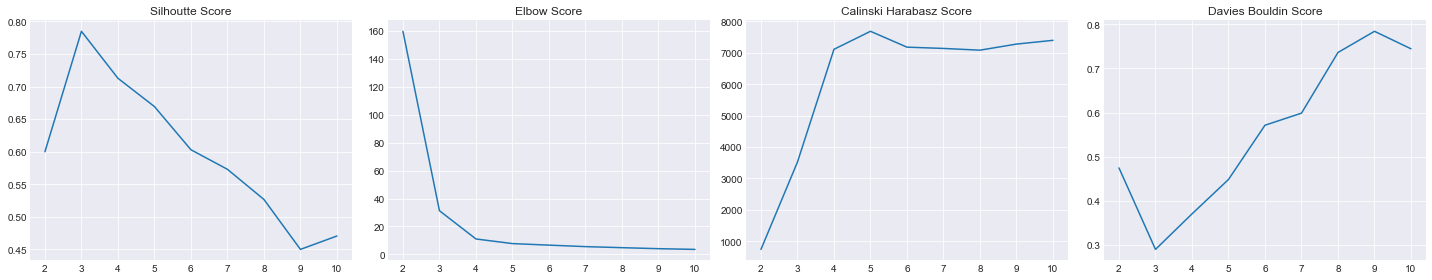

In [44]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
sns.lineplot(x = range(2, 11), y = inertia, ax = ax[1]); ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AFFINITY PROPAGATION**

In [45]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.6, 0.9, 10)):
    model = AffinityPropagation(damping = clu, random_state = 0)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))

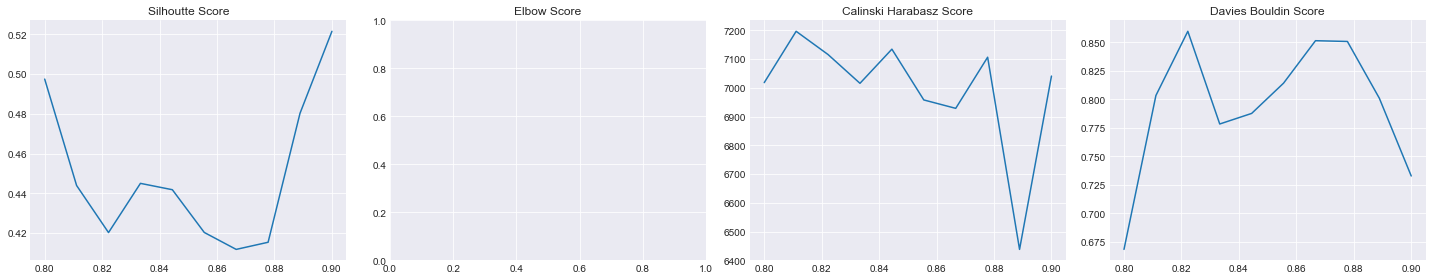

In [46]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**MEAN SHIFT**

In [47]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.5, 0.9, 10)):
    model = MeanShift(cluster_all = False, bandwidth = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

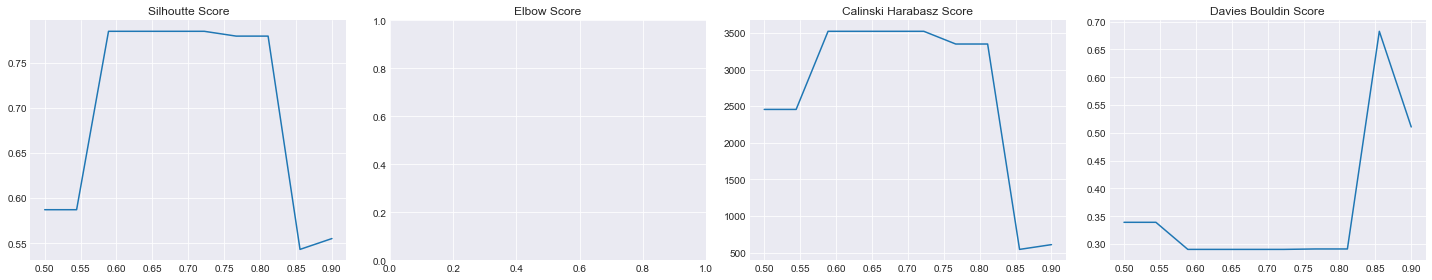

In [48]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**SPECTRAL CLUSTERING**

In [49]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = SpectralClustering(n_clusters = clu, n_neighbors = clu * 2)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

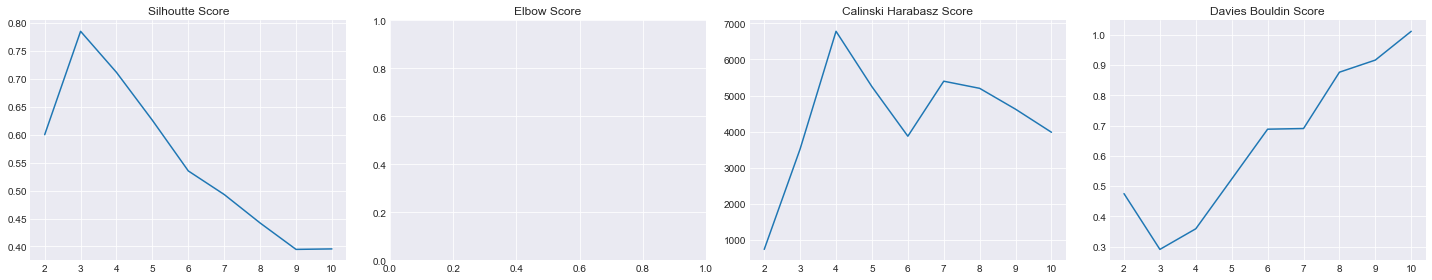

In [50]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AGGLOMERATIVE CLUSTERING**

In [51]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = AgglomerativeClustering(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

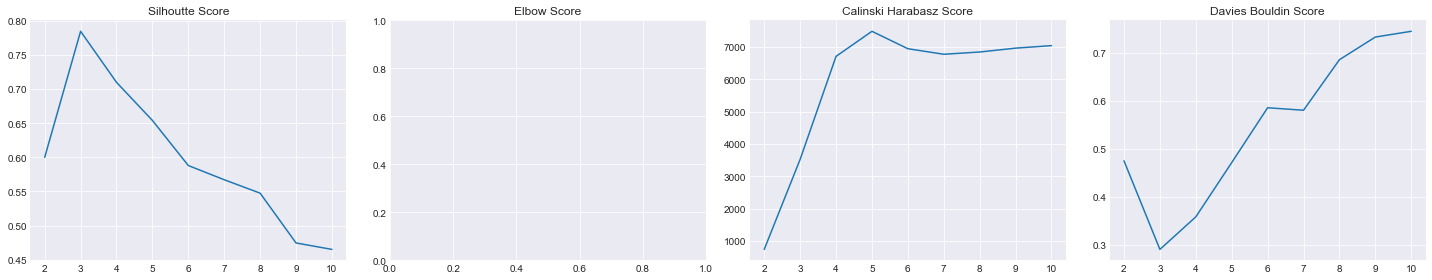

In [52]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

In [53]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

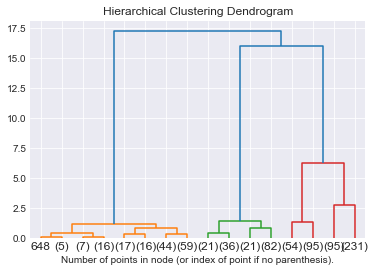

In [54]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**DBSCAN**

In [55]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.1, 0.5, 6)):
    model = DBSCAN(eps = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

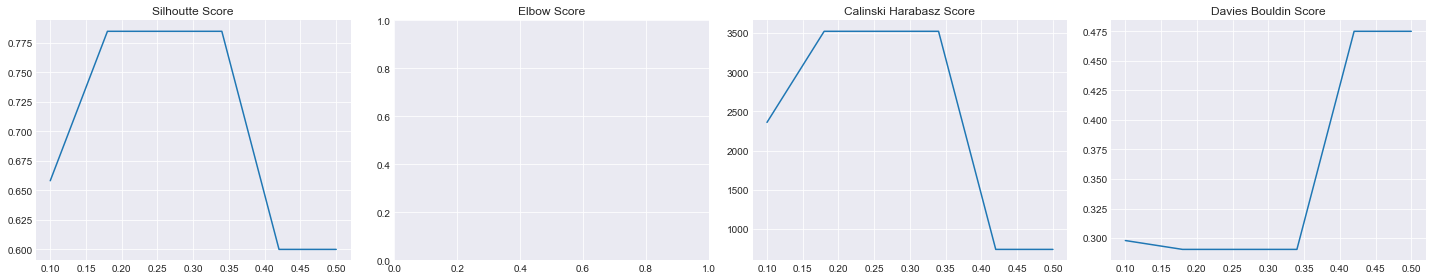

In [56]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**OPTICS**

In [57]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(1, 10, 10)):
    model = OPTICS(eps = clu, leaf_size = clu * 10)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

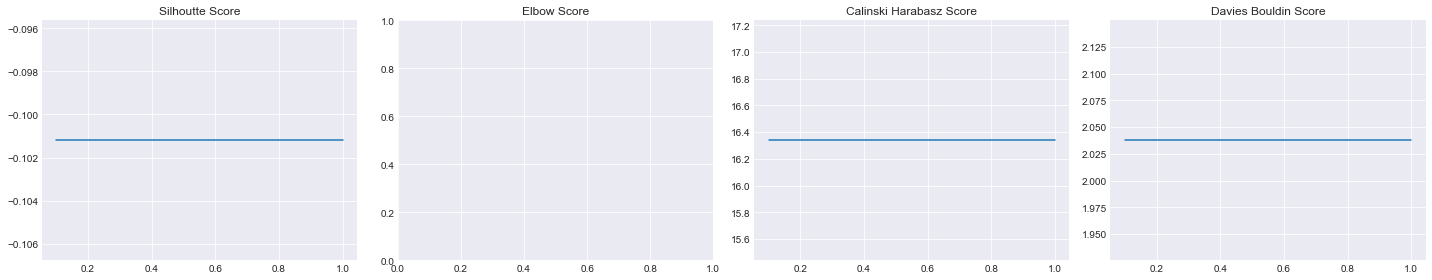

In [58]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**BIRCH**

In [59]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = Birch(n_clusters = clu, threshold = 0.1)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

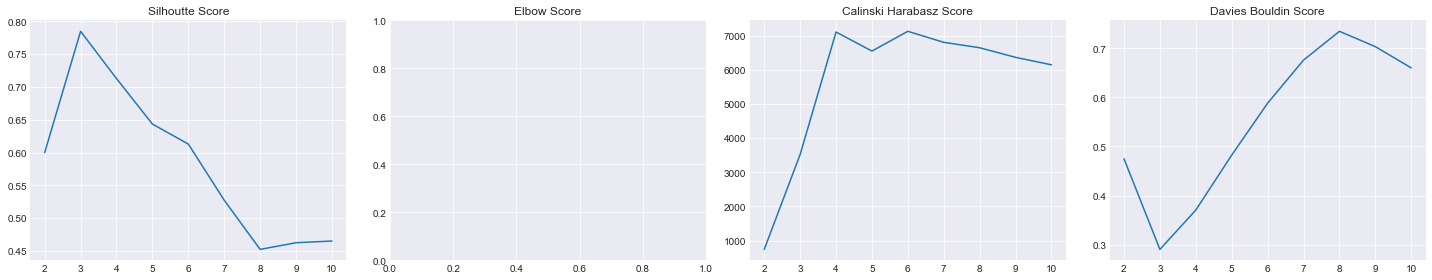

In [60]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**FINAL CHECK**

In [61]:
algorithm = {
    "KMeans": KMeans(n_clusters = 4),
    "Affinity Propagation": AffinityPropagation(damping = 0.9, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False, bandwidth = 0.8),
    "Spectral Clustering": SpectralClustering(n_clusters = 3, n_neighbors = 6),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters = 3),
    "DBSCAN": DBSCAN(eps = 0.34),
    "OPTICS": OPTICS(),
    "Birch": Birch(n_clusters = 3, threshold = 0.1)
}

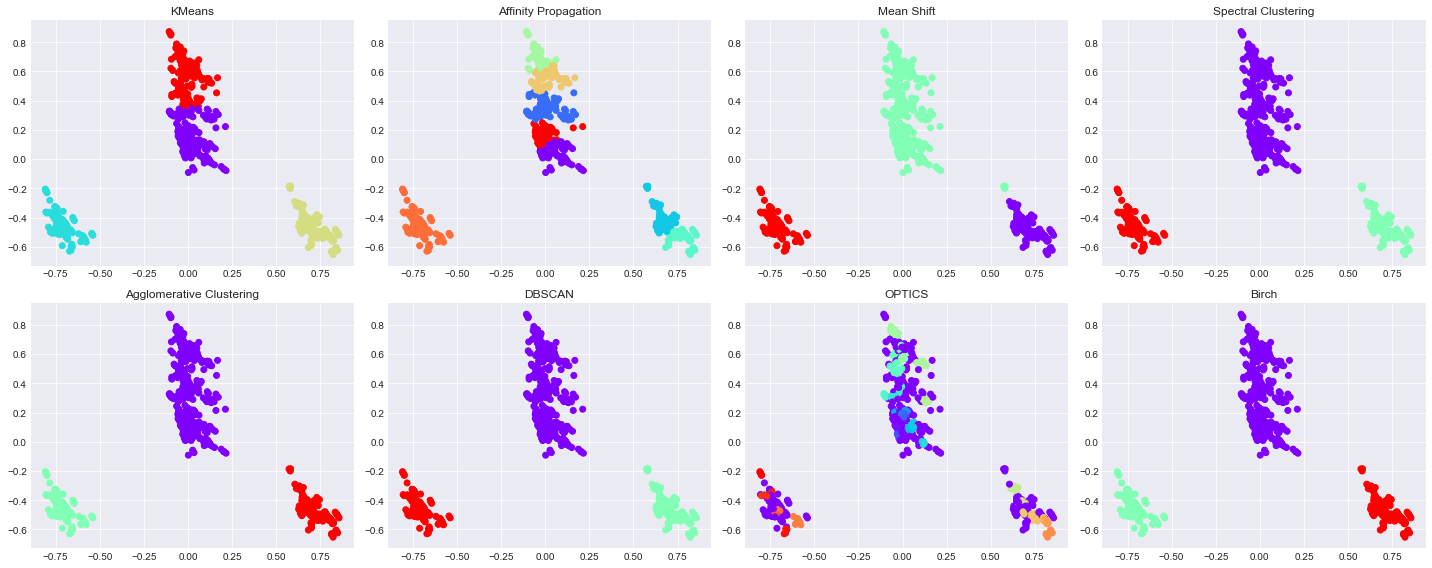

In [62]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_pokemon.png')

In [63]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [64]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.712744,0.521562,0.779492,0.784818,0.784818,0.784818,-0.101202,0.784818
Calinski,7112.212685,7040.757840,3348.795493,3522.512594,3522.512594,3522.512594,16.338660,3522.512594
Davies,0.370805,0.732798,0.291242,0.290464,0.290464,0.290464,2.037668,0.290464
